<IPython.core.display.Javascript object>


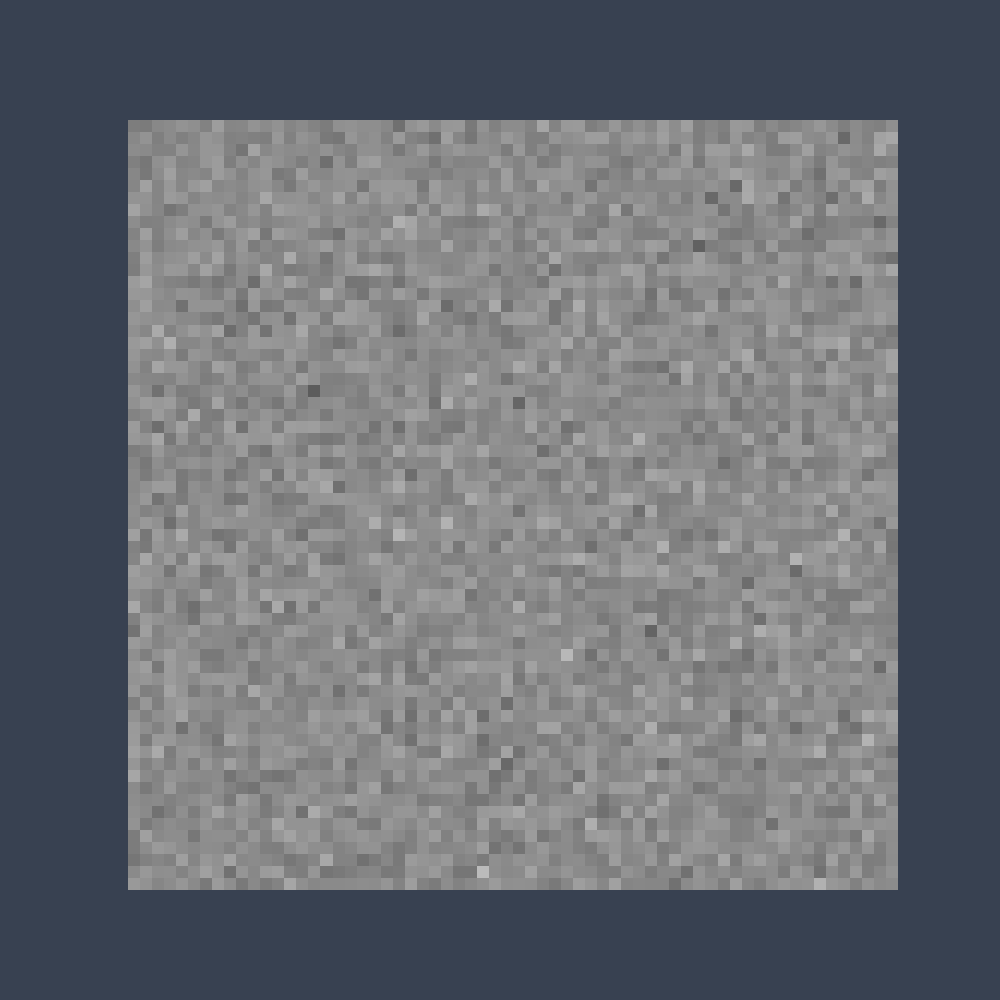

<IPython.core.display.Javascript object>


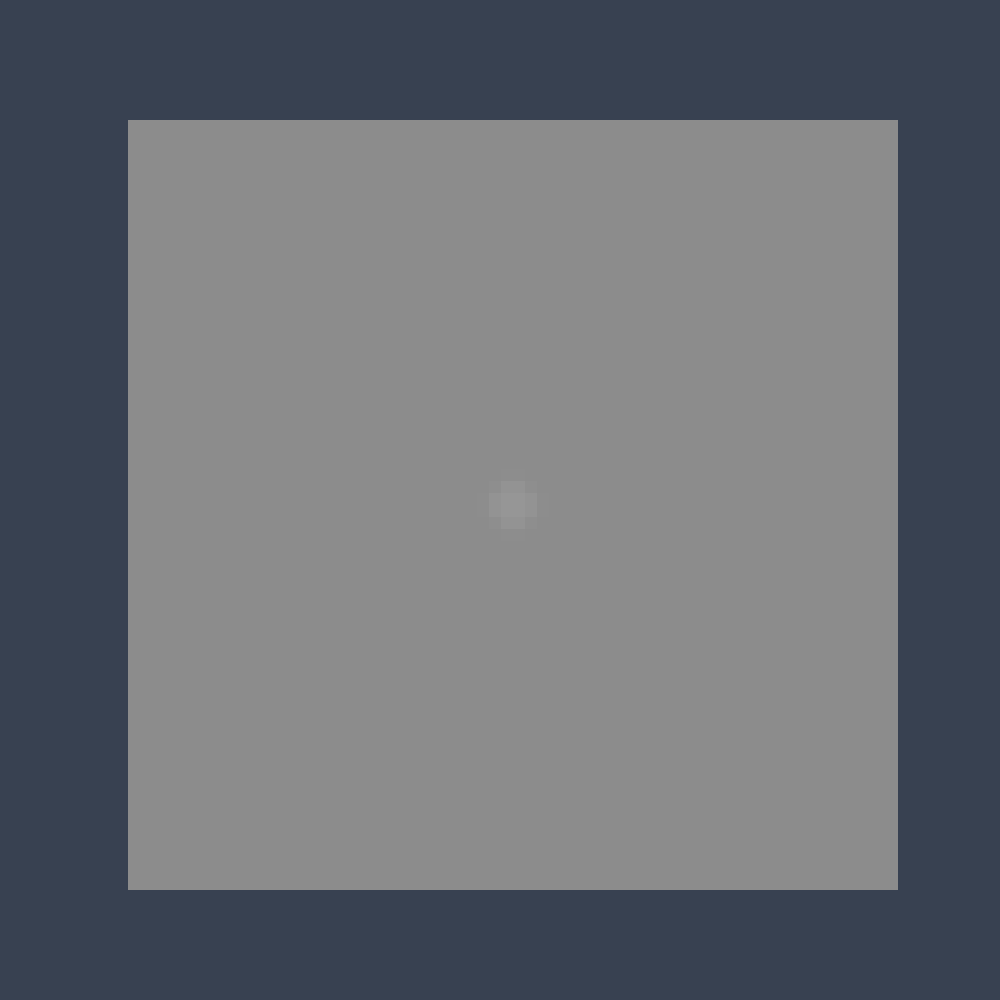

<IPython.core.display.Javascript object>


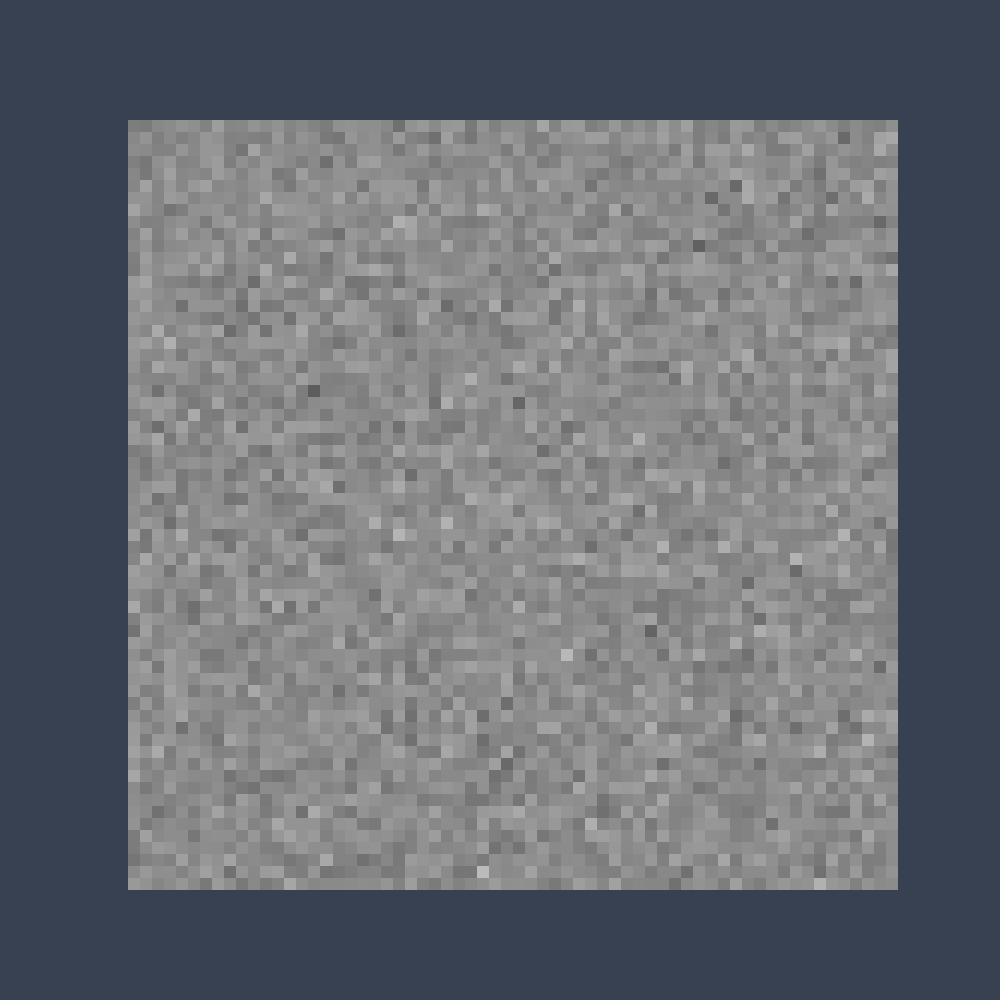

In [1]:
%matplotlib notebook

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

# Set plot theme
jtplot.style()

# Settings
signal_intensity = 10 # set signal intensity
background_intensity = 140 # set background intensity
var_noise = 150 # set var noise
gaussian_sigma = 0.5 # set sd of gaussian kernel
num_images = 4400 # number of images to create
image_size = 64
obj_dim1 = [30,34]
obj_dim2 = [31,33]
train_idx = 4200
val_idx = 4400

# Create list to store noise images
noise = []

# Create noise images
for n in range(num_images):
    # Create measurement noise
    noise.append(np.random.normal(0,var_noise**(0.5),(image_size,image_size)))

# Create background image
background = np.ones((image_size,image_size))*background_intensity
background_gauss = snd.filters.gaussian_filter(background,gaussian_sigma)

# Create signal image
signal = np.zeros((image_size,image_size))
signal[obj_dim1[0]:obj_dim1[1],obj_dim2[0]:obj_dim2[1]] = signal_intensity
signal[obj_dim2[0]:obj_dim2[1],obj_dim1[0]:obj_dim1[1]] = signal_intensity
signal_gauss = snd.filters.gaussian_filter(signal+background,gaussian_sigma)

# Combine background and signal
signal_absent = [background_gauss+nse for nse in noise]

# Combine signal + background + noise
signal_present = [signal_gauss+nse for nse in noise]

# Display Images (from 1st sample)

# signal absent image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_absent[0],cmap='gray',vmin=0,vmax=255)

# signal image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_gauss,cmap='gray',vmin=0,vmax=255)

# signal present image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_present[0],cmap='gray',vmin=0,vmax=255)
plt.show()

# plot images
plt.show()

<IPython.core.display.Javascript object>


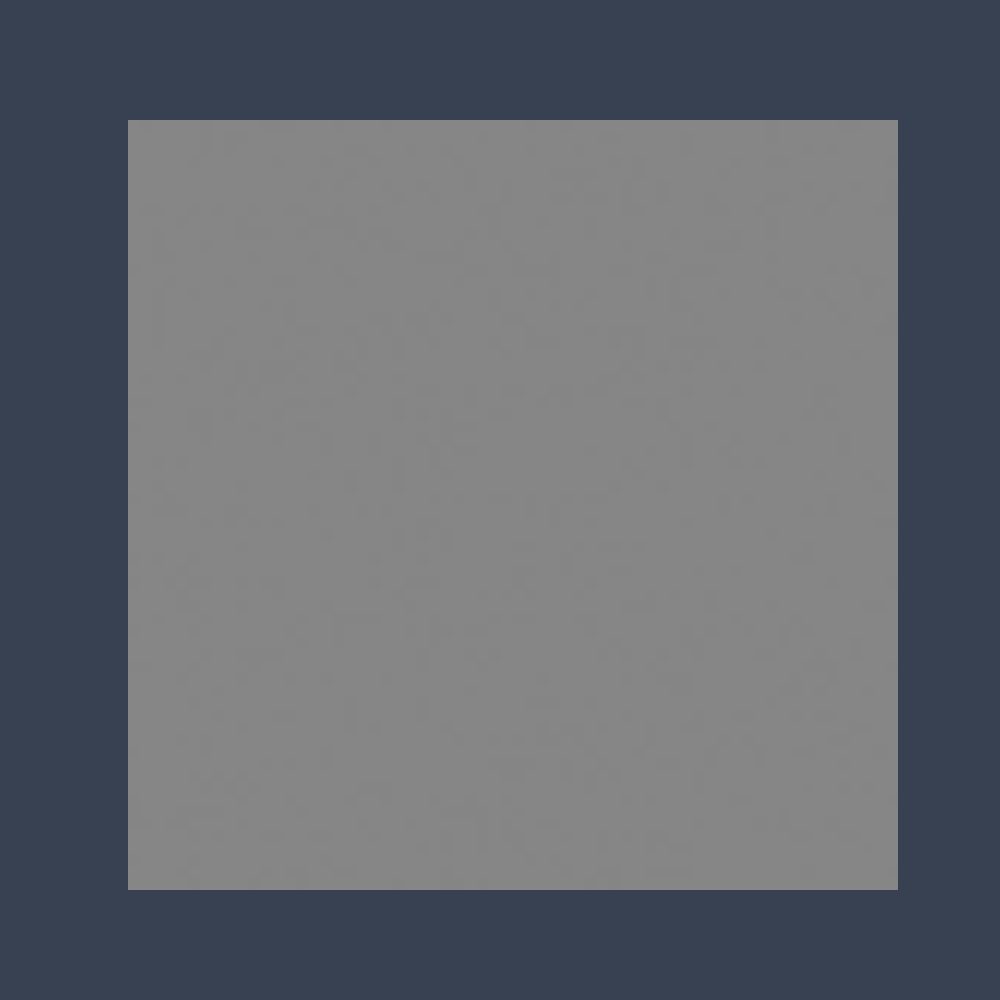

<IPython.core.display.Javascript object>


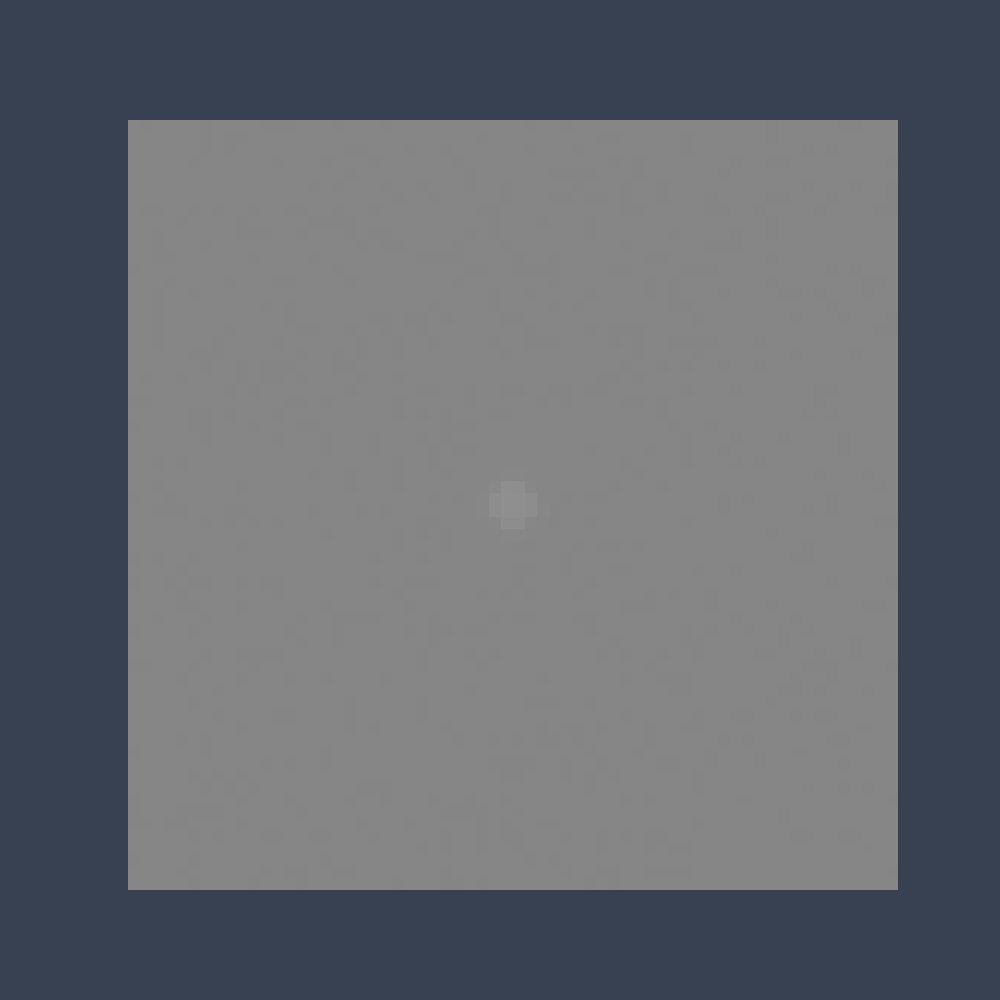

In [2]:
from functools import reduce

# split train/val set
train_signal_absent = signal_absent[0:train_idx]
train_signal_present = signal_present[0:train_idx]
val_signal_absent = signal_absent[train_idx:val_idx]
val_signal_present = signal_present[train_idx:val_idx]

# Generate average images for signal present/signal absent
avg_signal_absent = reduce(lambda x,y:x+y, train_signal_absent)/num_images
avg_signal_present = reduce(lambda x,y:x+y, train_signal_present)/num_images

# avg noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_absent,cmap='gray',vmin=0,vmax=255)

# avg signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_present,cmap='gray',vmin=0,vmax=255)

# plot images
plt.show()

# flatten arrays
noise_array = np.transpose(np.vstack([n.flatten() for n in noise[0:train_idx]]))
avg_signal_absent_array = avg_signal_absent.flatten()
avg_signal_present_array = avg_signal_present.flatten()
val_signal_absent = np.transpose(np.vstack([n.flatten() for n in val_signal_absent]))
val_signal_present = np.transpose(np.vstack([n.flatten() for n in val_signal_present]))

In [3]:
# combine validation images
data_array = np.hstack((val_signal_absent,val_signal_present))

# # calculate covariance/inverse covariance matrix # only for correlated gaussian noise
# covariance = np.cov(noise_array)
# icov = np.linalg.inv(covariance)

# calculate diffence of avg 2 classes
avg_t = avg_signal_present_array-avg_signal_absent_array

# calculate test statistic
#l_pw = np.matmul(np.matmul(avg_t,icov),data_array)
l_pw = np.matmul(avg_t,data_array)

[16070.725153612351, 16583.00953558486, 15753.564796081015, 16544.18272762144, 16385.95926971222, 16220.607507449626, 16423.40486582434, 16484.380086549056, 16324.932920441832, 16302.747088584314, 16135.496610017899, 16253.667368044516, 16312.74742443678, 15650.83171073785, 16009.22695027635, 16057.093817921894, 16115.795883896844, 15194.555522222669, 16124.95957760419, 16010.672436620414, 16727.004701846035, 15833.701249440528, 15747.266605608145, 15930.9249959106, 16290.758433979126, 15996.078740298386, 15239.665224755254, 16601.145528274777, 15920.264857597882, 16151.323532953234, 16465.51199164368, 16376.09834608164, 15475.433699129328, 15904.57260265886, 15615.693641798067, 16314.43860358562, 16121.969433023081, 15002.53190215903, 16175.923340922498, 16047.563112703918, 16065.261124715418, 16019.201841828235, 15698.624119910219, 15512.622483892683, 15456.218150973284, 16109.36154153549, 16088.559842861327, 16424.835313089934, 15826.420531399004, 15515.983415054212, 16156.620519322

<IPython.core.display.Javascript object>


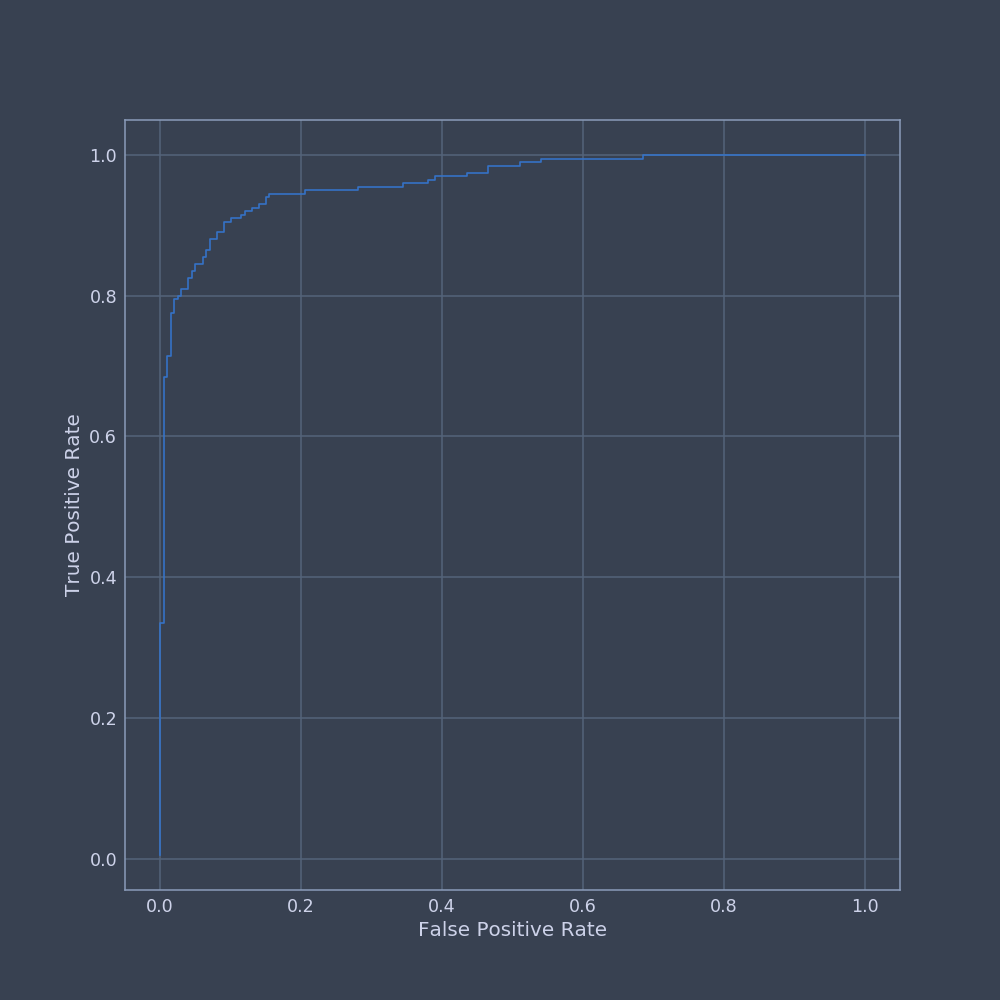

In [4]:
from sklearn.metrics import roc_auc_score,roc_curve

# print performance
print(list(l_pw))
img_cls = np.array([0]*(val_idx-train_idx) + [1]*(val_idx-train_idx))
[fpr,tpr,threshold] = roc_curve(img_cls,l_pw)
print("AUC: {}".format(roc_auc_score(img_cls,l_pw)))
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()